# EV Exploring relationships

## Table of content

1. Importing libraries and dataframe

2. New variable: GDP per capita

    2.1 GDP per capita
    
    2.2 New car sales per 1'000 inhabitants
    
    2.3 Car stock per 1'000 inhabitants
    
    2.4 Exporting dataframe with the new variable

3. Exploring relationships

    3.1 Correlation
    
    3.2 Scatterplots
    
    3.3 Pair plots
    
    3.4 Categorical plots
    
    3.5 Bar plot

4. Questions to explore

5. Hypothesis

# 1. Importing libraries and dataframe

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Creating shortcut path to data
path_data = r'C:\Users\henri\Documents\Tonia\Learning\CarrrerFoundry\Data Immersion\Achievement 6\EV Analysis in EU\02 Data'

In [3]:
path_data

'C:\\Users\\henri\\Documents\\Tonia\\Learning\\CarrrerFoundry\\Data Immersion\\Achievement 6\\EV Analysis in EU\\02 Data'

In [4]:
# Importing ev_clean.pkl
ev_df = pd.read_pickle(os.path.join(path_data, 'Prepared Data', 'ev_clean.pkl'))

In [5]:
ev_df.head()

,engine_type_code,country_code,year,new_car,stock_car,gdp_eur,age_code,income_indicator,currency,income,demographic_indicator_code,population,engine,country,age_group,country_group
0,ALT,AL,2019,3757.0,35881.0,13754.2,TOTAL,Median,EUR,2231.0,AVG,2854191.0,Other,Albania,Total,other
1,ALT,AL,2019,3757.0,35881.0,13754.2,TOTAL,Median,PPS,4252.0,AVG,2854191.0,Other,Albania,Total,other
2,ALT,AL,2019,3757.0,35881.0,13754.2,TOTAL,Mean,EUR,2619.0,AVG,2854191.0,Other,Albania,Total,other
3,ALT,AL,2019,3757.0,35881.0,13754.2,TOTAL,Mean,PPS,4992.0,AVG,2854191.0,Other,Albania,Total,other
4,ALT,AL,2019,3757.0,35881.0,13754.2,Y18-64,Median,EUR,2319.0,AVG,2854191.0,Other,Albania,18-64,other


# 2. New variables

To explore the relationships between the variables, I would like to add new variables to the dataframe.

## 2.1 GDP per capita

In [6]:
# Creating a new column "gdp_per_capita" by dividing the gdp per number of population. Since the GDP values are in milions,
# I divide the number by million to have the gdp per capita in EUR.
ev_df.loc[ev_df['population'] > 0, 'gdp_per_capita'] = ev_df['gdp_eur']/ev_df['population']/1000000

In [7]:
#Check to see if the numbers are correct
ev_df.groupby('country').agg({'gdp_per_capita': ['mean', 'min', 'max']})

gdp_per_capita                            
                                 mean           min           max
country                                                          
Albania                  4.483699e-09  3.324742e-09  5.390894e-09
Austria                  4.181323e-08  3.819775e-08  4.535037e-08
Belgium                  3.899317e-08  3.520617e-08  4.337240e-08
Bosnia and Herzegovina   4.454258e-09  3.571825e-09  4.963793e-09
Bulgaria                 8.101218e-09  5.787961e-09  1.033435e-08
Croatia                  1.226735e-08  1.038443e-08  1.475038e-08
Cyprus                   2.344233e-08  2.050759e-08  2.667723e-08
Czech Republic           1.899913e-08  1.499440e-08  2.267796e-08
Denmark                  5.100161e-08  4.608118e-08  5.749260e-08
Estonia                  1.835089e-08  1.434814e-08  2.362623e-08
Finland                  4.101985e-08  3.756611e-08  4.522527e-08
France                   3.421314e-08  3.219016e-08  3.690542e-08
Germany                  3.982629e-08  3.486055e-08  4.329231e-08
Greece                   1.674755e-08  1.546052e-08  1.718905e-08
Hungary                  1.287130e-08  1.033446e-08  1.587249e-08
Iceland                  6.301279e-08  5.152116e-08  6.382557e-08
Ireland                  6.456027e-08  3.881158e-08  8.469492e-08
Italy                    2.828988e-08  2.677132e-08  3.023135e-08
Kosovo                   3.717222e-09  3.549097e-09  3.944455e-09
Latvia                   1.432932e-08  1.132404e-08  1.783851e-08
Liechtenstein            1.447280e-07  1.301211e-07  1.510616e-07
Lithuania                1.530522e-08  1.184692e-08  2.004881e-08
Luxembourg               9.984773e-08  9.035354e-08  1.129496e-07
Malta                    2.442374e-08  1.865004e-08  2.893126e-08
Montenegro               7.103494e-09  5.561023e-09  8.002280e-09
Netherlands              4.371671e-08  3.930291e-08  4.879187e-08
North Macedonia          4.733325e-09  3.948388e-09  5.984861e-09
Norway                   6.796511e-08  6.001028e-08  7.793035e-08
Poland                   1.261712e-08  1.020911e-08  1.526958e-08
Portugal                 1.873749e-08  1.630367e-08  2.084086e-08
Romania                  9.736253e-09  7.152277e-09  1.261728e-08
Serbia                   7.221744e-09  6.785686e-09  7.803154e-09
Slovakia                 1.552886e-08  1.376083e-08  1.841728e-08
Slovenia                 2.099864e-08  1.769667e-08  2.476572e-08
Spain                    2.444015e-08  2.189352e-08  2.642447e-08
Sweden                   4.702544e-08  4.525876e-08  5.168274e-08
Switzerland              7.282952e-08  6.573203e-08  7.774963e-08
Türkiye                  8.833550e-09  7.516275e-09  9.934255e-09
United Kingdom           3.730729e-08  3.572253e-08  4.061533e-08

## 2.2 New car sales per 1'000 inhabitants

In [8]:
# Creating a new column "new_car_per_1000" by dividing the new car sales by number of population. 

ev_df.loc[ev_df['population'] > 0, 'new_car_per_1000'] = ev_df['new_car']/ev_df['population']*1000

In [9]:
#Check to see if the numbers are correct
ev_df.groupby('country').agg({'new_car_per_1000': ['mean', 'min', 'max']})

new_car_per_1000                     
                                   mean       min        max
country                                                     
Albania                        2.911755  0.000356  15.262832
Austria                        4.529217  0.000000  21.775074
Belgium                        8.132970  0.000087  31.833026
Bosnia and Herzegovina         2.658974  0.000000  15.798490
Bulgaria                       0.003344  0.003344   0.003344
Croatia                        4.694899  0.000242  24.179498
Cyprus                         1.468050  0.000000  10.074904
Czech Republic                 2.606783  0.000000  13.491441
Denmark                        6.621259  0.000000  27.454148
Estonia                        3.322293  0.000000  15.457104
Finland                        2.408482  0.000000  16.226379
France                         3.514938  0.000000  20.389372
Germany                        5.539655  0.000302  27.661837
Greece                         1.118316  0.000182   7.189660
Hungary                        1.411616  0.000000  12.680812
Iceland                       10.902199  0.002835  39.735003
Ireland                        4.584932  0.000000  22.134508
Italy                          6.963844  0.013746  18.673529
Kosovo                         0.719166  0.000000  12.626258
Latvia                         1.088407  0.000000   5.953009
Liechtenstein                  6.520562  0.000000  30.754869
Lithuania                      5.512337  0.000000  39.289777
Luxembourg                    10.088541  0.000000  39.439806
Malta                          2.326136  0.000000  22.123629
Montenegro                     1.293920  0.001607   3.257088
Netherlands                    2.772577  0.000000  20.925074
North Macedonia                     NaN       NaN        NaN
Norway                         4.074475  0.000000  21.529052
Poland                         4.470879  0.000000  20.672730
Portugal                       2.210344  0.000000  13.518150
Romania                        1.152853  0.000050   5.914004
Serbia                         1.152590  0.231768   2.175489
Slovakia                            NaN       NaN        NaN
Slovenia                       6.895603  0.004358  23.260591
Spain                          2.767608  0.000000  18.331664
Sweden                         4.024319  0.000000  21.527623
Switzerland                    4.223141  0.000000  25.069735
Türkiye                        1.195103  0.000000   5.908975
United Kingdom                 6.031434  0.000015  23.918293

## 2.3 Car stock per 1'000 inhabitants

In [10]:
# Creating a new column "stock_car_per_1000" by dividing the car stock by number of population. 

ev_df.loc[ev_df['population'] > 0, 'stock_car_per_1000'] = ev_df['stock_car']/ev_df['population']*1000

In [11]:
#Check to see if the numbers are correct
ev_df.groupby('country').agg({'stock_car_per_1000': ['mean', 'min', 'max']})

stock_car_per_1000                        
                                     mean         min         max
country                                                          
Albania                         45.700180    0.000000  211.006495
Austria                        109.035040    0.000000  573.241667
Belgium                        121.827637    0.000000  512.596418
Bosnia and Herzegovina          63.495926    0.000000  263.386627
Bulgaria                       344.291968    0.489841  441.027848
Croatia                         94.696698    0.000000  454.625215
Cyprus                         106.290523    0.000000  657.690958
Czech Republic                 141.214443    0.000000  579.560455
Denmark                        118.324951    0.000171  475.956988
Estonia                        138.919489    0.000000  620.569646
Finland                        115.877114    0.000000  657.195601
France                         100.212570    0.000000  571.666611
Germany                        123.958467    0.004622  583.451518
Greece                         484.986388  467.315038  530.237699
Hungary                         66.584568    0.000000  414.027202
Iceland                        232.082834    0.064426  775.842908
Ireland                        125.086150    0.000000  459.732073
Italy                          156.858483    0.000856  673.441336
Kosovo                          23.914091    0.000000  173.017249
Latvia                          70.824058    0.000000  402.595928
Liechtenstein                  149.921091    0.000000  784.404740
Lithuania                      130.771264    0.000000  611.620086
Luxembourg                     137.127550    0.000000  687.810181
Malta                          115.320359    0.000000  623.501332
Montenegro                     110.595480    0.001607  357.559862
Netherlands                     96.691876    0.000000  504.176361
North Macedonia                 62.695740    0.015478  244.664384
Norway                         102.418170    0.000000  555.256531
Poland                         122.366650    0.000000  685.345034
Portugal                        88.473187    0.000000  543.595432
Romania                         75.442604    0.000049  398.024031
Serbia                         239.462164    0.000000  313.781485
Slovakia                       319.156898    0.324041  457.695970
Slovenia                       169.963285    0.000433  564.237393
Spain                          104.971704    0.000000  525.418429
Sweden                          84.608428    0.000096  481.702970
Switzerland                     96.305662    0.000000  548.242263
Türkiye                         29.761173    0.000000  157.091698
United Kingdom                 105.806699    0.000107  474.231626

## 2.4 Exporting dataframe with the new variable

In [12]:
# Exporting the final dataframe to pickle
ev_df.to_pickle(os.path.join(path_data, 'Prepared Data', 'ev_new_variable.pkl'))

In [13]:
# Exporting the final dataframe to csv
ev_df.to_csv(os.path.join(path_data, 'Prepared Data', 'ev_new_variable.csv'))

# 3. Exploring relationships

Before exploring the relationships between the variables, we need to make sure we are taking only one type of data in the analysis (e.g. in income_indicator we have both median and mean, in age_group we have total and split by age groups). I will therefore create a subset for the analysis, which contains:

    age_group: total
    income_indicator: median
    currency: EUR

In [53]:
car_age = ev_df[ev_df['age_group'] == 'Total']

In [54]:
car_inc = car_age[car_age['income_indicator'] == 'Median']

In [55]:
car_df = car_inc[car_inc['currency'] == 'EUR']

In [56]:
car_df

,engine_type_code,country_code,year,new_car,stock_car,gdp_eur,age_code,income_indicator,currency,income,demographic_indicator_code,population,engine,country,age_group,country_group,gdp_per_capita,new_car_per_1000,stock_car_per_1000
0,ALT,AL,2019,3757.0,35881.0,13754.2,TOTAL,Median,EUR,2231.0,AVG,2854191.0,Other,Albania,Total,other,4.818949e-09,1.316310,12.571338
20,ALT,AL,2020,4935.0,43675.0,13310.4,TOTAL,Median,EUR,2523.0,AVG,2837848.0,Other,Albania,Total,other,4.690315e-09,1.738994,15.390183
41,ALT,AT,2013,1285.0,5972.0,323910.2,TOTAL,Median,EUR,22073.0,AVG,8479823.0,Other,Austria,Total,EU,3.819775e-08,0.151536,0.704260
61,ALT,AT,2014,2074.0,7931.0,333146.1,TOTAL,Median,EUR,23211.0,AVG,8546356.0,Other,Austria,Total,EU,3.898107e-08,0.242677,0.927998
81,ALT,AT,2015,2389.0,10125.0,344269.2,TOTAL,Median,EUR,23260.0,AVG,8642699.0,Other,Austria,Total,EU,3.983353e-08,0.276418,1.171509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89415,TOTAL,UK,2015,NaN,30250294.0,2644716.5,TOTAL,Median,EUR,21028.0,AVG,65116219.0,NaN,United Kingdom,Total,other,4.061533e-08,NaN,464.558515
89435,TOTAL,UK,2016,NaN,30850440.0,2434119.2,TOTAL,Median,EUR,21136.0,AVG,65611593.0,NaN,United Kingdom,Total,other,3.709892e-08,NaN,470.198003
89455,TOTAL,UK,2017,NaN,31200182.0,2359789.9,TOTAL,Median,EUR,20995.0,AVG,66058859.0,NaN,United Kingdom,Total,other,3.572253e-08,NaN,472.308824
89475,TOTAL,UK,2018,NaN,31517597.0,2420897.2,TOTAL,Median,EUR,21464.0,AVG,66460344.0,NaN,United Kingdom,Total,other,3.642619e-08,NaN,474.231626


## 3.1 Correlations

In [57]:
# Create a correlation matrix using pandas
car_df.corr()

C:\Users\henri\AppData\Local\Temp\ipykernel_10776\2194442300.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_df.corr()


,year,new_car,stock_car,gdp_eur,income,population,gdp_per_capita,new_car_per_1000,stock_car_per_1000
year,1.000000,-0.018956,-0.034280,0.038385,0.096251,-0.021366,0.104738,-0.019321,-0.047288
new_car,-0.018956,1.000000,0.921000,0.465153,0.029404,0.426436,0.007668,0.545108,0.468182
stock_car,-0.034280,0.921000,1.000000,0.437295,0.002159,0.427585,-0.027796,0.485367,0.528367
gdp_eur,0.038385,0.465153,0.437295,1.000000,0.215705,0.858919,0.123680,0.068069,0.005525
income,0.096251,0.029404,0.002159,0.215705,1.000000,-0.080549,0.938857,0.137451,0.035797
population,-0.021366,0.426436,0.427585,0.858919,-0.080549,1.000000,-0.132006,0.011824,-0.025865
gdp_per_capita,0.104738,0.007668,-0.027796,0.123680,0.938857,-0.132006,1.000000,0.145965,0.039149
new_car_per_1000,-0.019321,0.545108,0.485367,0.068069,0.137451,0.011824,0.145965,1.000000,0.810232
stock_car_per_1000,-0.047288,0.468182,0.528367,0.005525,0.035797,-0.025865,0.039149,0.810232,1.000000


### Create a correlation heatmap using seaborn

In [58]:
car_df.columns

Index(['engine_type_code', 'country_code', 'year', 'new_car', 'stock_car',
       'gdp_eur', 'age_code', 'income_indicator', 'currency', 'income',
       'demographic_indicator_code', 'population', 'engine', 'country',
       'age_group', 'country_group', 'gdp_per_capita', 'new_car_per_1000',
       'stock_car_per_1000'],
      dtype='object')

In [59]:
# Create a subset only for certain columns

sub = car_df[['new_car', 'stock_car', 'gdp_eur', 'income', 'population', 'gdp_per_capita']]

In [60]:
sub

,new_car,stock_car,gdp_eur,income,population,gdp_per_capita
0,3757.0,35881.0,13754.2,2231.0,2854191.0,4.818949e-09
20,4935.0,43675.0,13310.4,2523.0,2837848.0,4.690315e-09
41,1285.0,5972.0,323910.2,22073.0,8479823.0,3.819775e-08
61,2074.0,7931.0,333146.1,23211.0,8546356.0,3.898107e-08
81,2389.0,10125.0,344269.2,23260.0,8642699.0,3.983353e-08
...,...,...,...,...,...,...
89415,NaN,30250294.0,2644716.5,21028.0,65116219.0,4.061533e-08
89435,NaN,30850440.0,2434119.2,21136.0,65611593.0,3.709892e-08
89455,NaN,31200182.0,2359789.9,20995.0,66058859.0,3.572253e-08
89475,NaN,31517597.0,2420897.2,21464.0,66460344.0,3.642619e-08


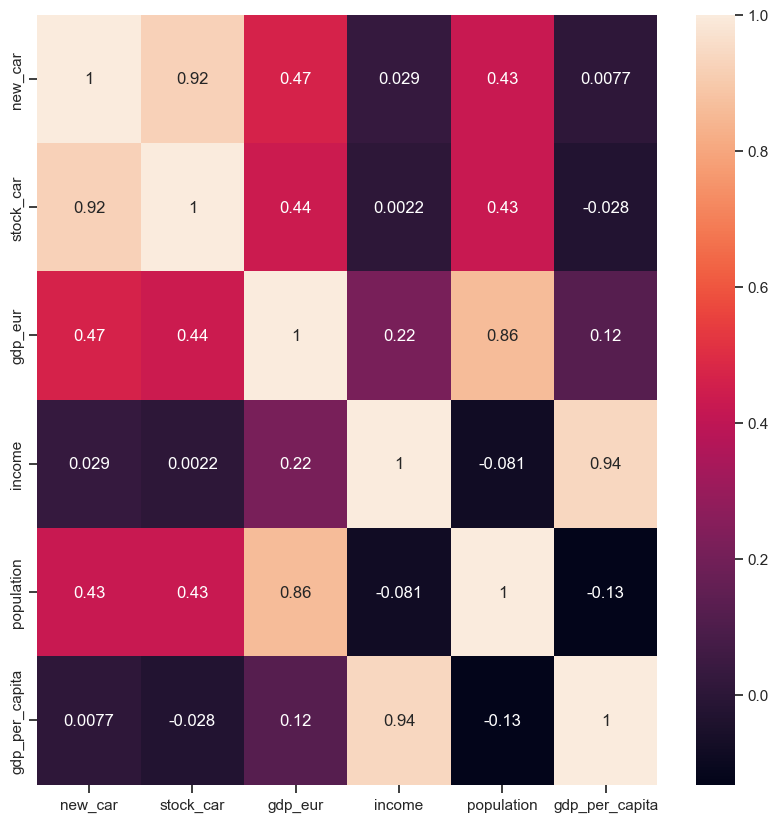

In [61]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In our analysis, we try to see if there is a relation between the new car sold and the GDP, population and income. We see that there is a correlation between the new_car and gdp_eur and new_car and population. We have to also see if there is a similar correlation only for the electric vehicles.

### Creating a correlation map for electric cars only

In [62]:
# Creating a subset only for electic cars
ev_only = car_df[car_df['engine'] == 'Electric']

In [63]:
ev_only.head()

,engine_type_code,country_code,year,new_car,stock_car,gdp_eur,age_code,income_indicator,currency,income,demographic_indicator_code,population,engine,country,age_group,country_group,gdp_per_capita,new_car_per_1000,stock_car_per_1000
21266,ELC,AL,2019,24.0,124.0,13754.2,TOTAL,Median,EUR,2231.0,AVG,2854191.0,Electric,Albania,Total,other,4.818949e-09,0.008409,0.043445
21286,ELC,AL,2020,239.0,362.0,13310.4,TOTAL,Median,EUR,2523.0,AVG,2837848.0,Electric,Albania,Total,other,4.690315e-09,0.084219,0.127561
21307,ELC,AT,2013,654.0,2070.0,323910.2,TOTAL,Median,EUR,22073.0,AVG,8479823.0,Electric,Austria,Total,EU,3.819775e-08,0.077124,0.244109
21327,ELC,AT,2014,1281.0,3386.0,333146.1,TOTAL,Median,EUR,23211.0,AVG,8546356.0,Electric,Austria,Total,EU,3.898107e-08,0.149888,0.396192
21347,ELC,AT,2015,1677.0,5032.0,344269.2,TOTAL,Median,EUR,23260.0,AVG,8642699.0,Electric,Austria,Total,EU,3.983353e-08,0.194037,0.582226


In [64]:
sub_ev = ev_only[['new_car', 'stock_car', 'gdp_eur', 'income', 'population', 'gdp_per_capita']]

In [65]:
sub_ev

,new_car,stock_car,gdp_eur,income,population,gdp_per_capita
21266,24.0,124.0,13754.2,2231.0,2854191.0,4.818949e-09
21286,239.0,362.0,13310.4,2523.0,2837848.0,4.690315e-09
21307,654.0,2070.0,323910.2,22073.0,8479823.0,3.819775e-08
21327,1281.0,3386.0,333146.1,23211.0,8546356.0,3.898107e-08
21347,1677.0,5032.0,344269.2,23260.0,8642699.0,3.983353e-08
...,...,...,...,...,...,...
69322,NaN,50.0,NaN,3326.0,74223629.0,NaN
69342,NaN,230.0,NaN,3222.0,75175827.0,NaN
69362,NaN,2000.0,NaN,17106.0,62766365.0,NaN
69382,NaN,3000.0,NaN,17136.0,63258810.0,NaN


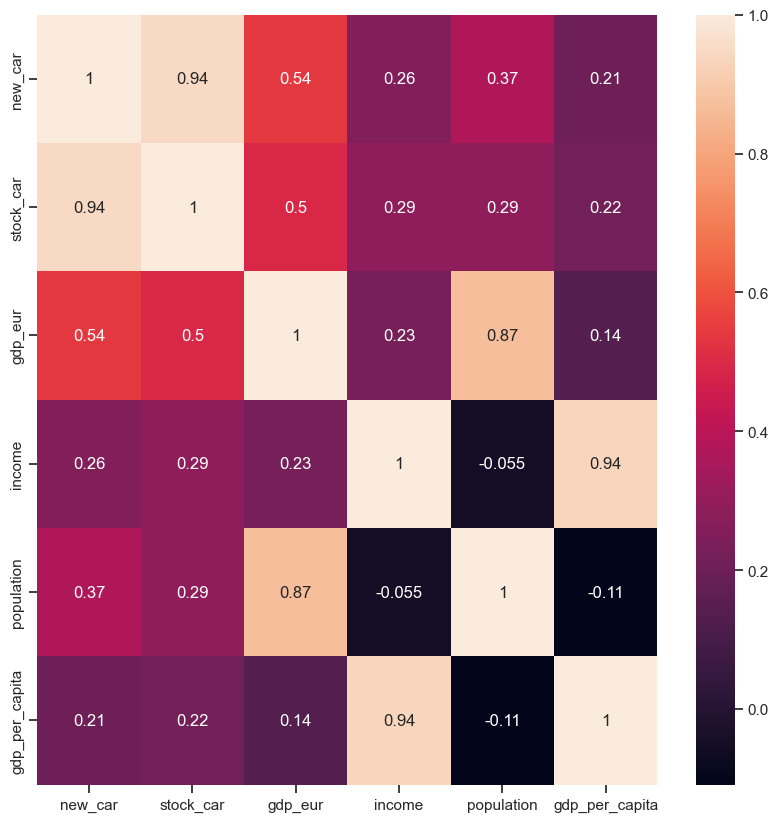

In [66]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_ev.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The correlations are slightly different when analyzed only for the electric cars. We see that there is a strong correlation between electric car sales (new_car) and GDP and moderate correlation between electric car sales (new_car) and income and population.

## 3.2 Scatterplots

### Car sales and GDP

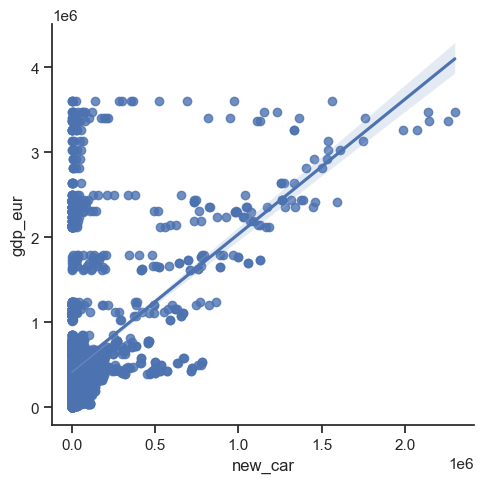

In [67]:
# Create a scatterplot for the "new_car" and "gdp_eur" columns in seaborn

sns.lmplot(x = 'new_car', y = 'gdp_eur', data = sub)

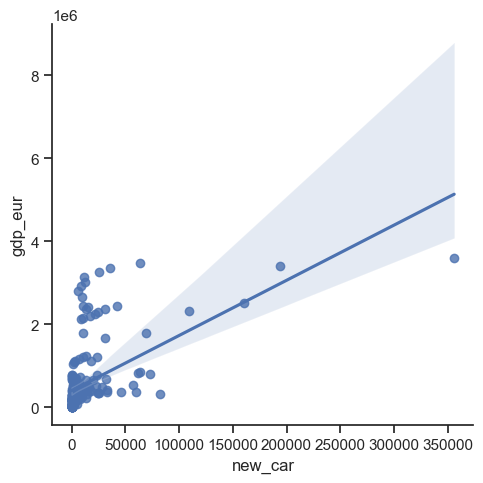

In [68]:
# Create a scatterplot for the "new_car" and "gdp_eur" columns in seaborn for electric cars only.

sns.lmplot(x = 'new_car', y = 'gdp_eur', data = sub_ev)

There is a positive correlation between the new car sales and the GDP. I need to do more analysis to confim this.

### Car sales and population

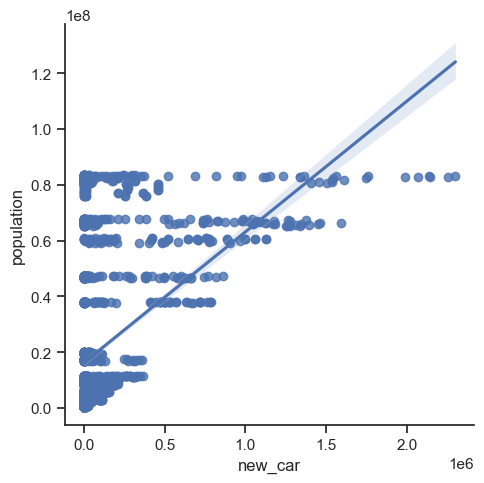

In [69]:
# Create a scatterplot for the "new_car" and "population" columns in seaborn

sns.lmplot(x = 'new_car', y = 'population', data = sub)

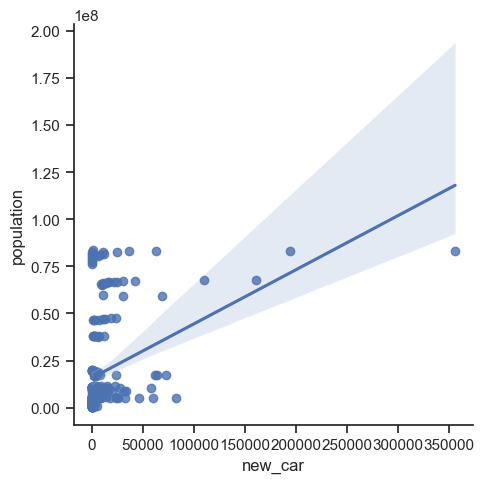

In [70]:
sns.lmplot(x = 'new_car', y = 'population', data = sub_ev)

There is a positive correlation between the new car sales and the population. I need to do more analysis to confim this.

### Car sales per 1000 inhabitants vs GDP per capita 

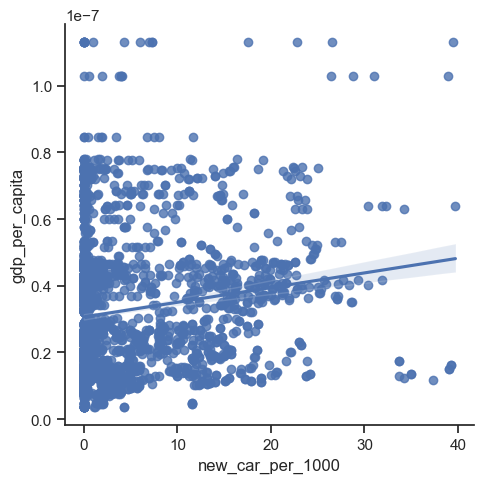

In [71]:
sns.lmplot(x = 'new_car_per_1000', y = 'gdp_per_capita', data = car_df)

## 3.3 Pair plots

#### Pair plots for all cars

In [72]:
# Keeping only the variables I want to use in the pair plot

sub_2 = sub[['new_car', 'gdp_eur', 'income','population', 'gdp_per_capita']]

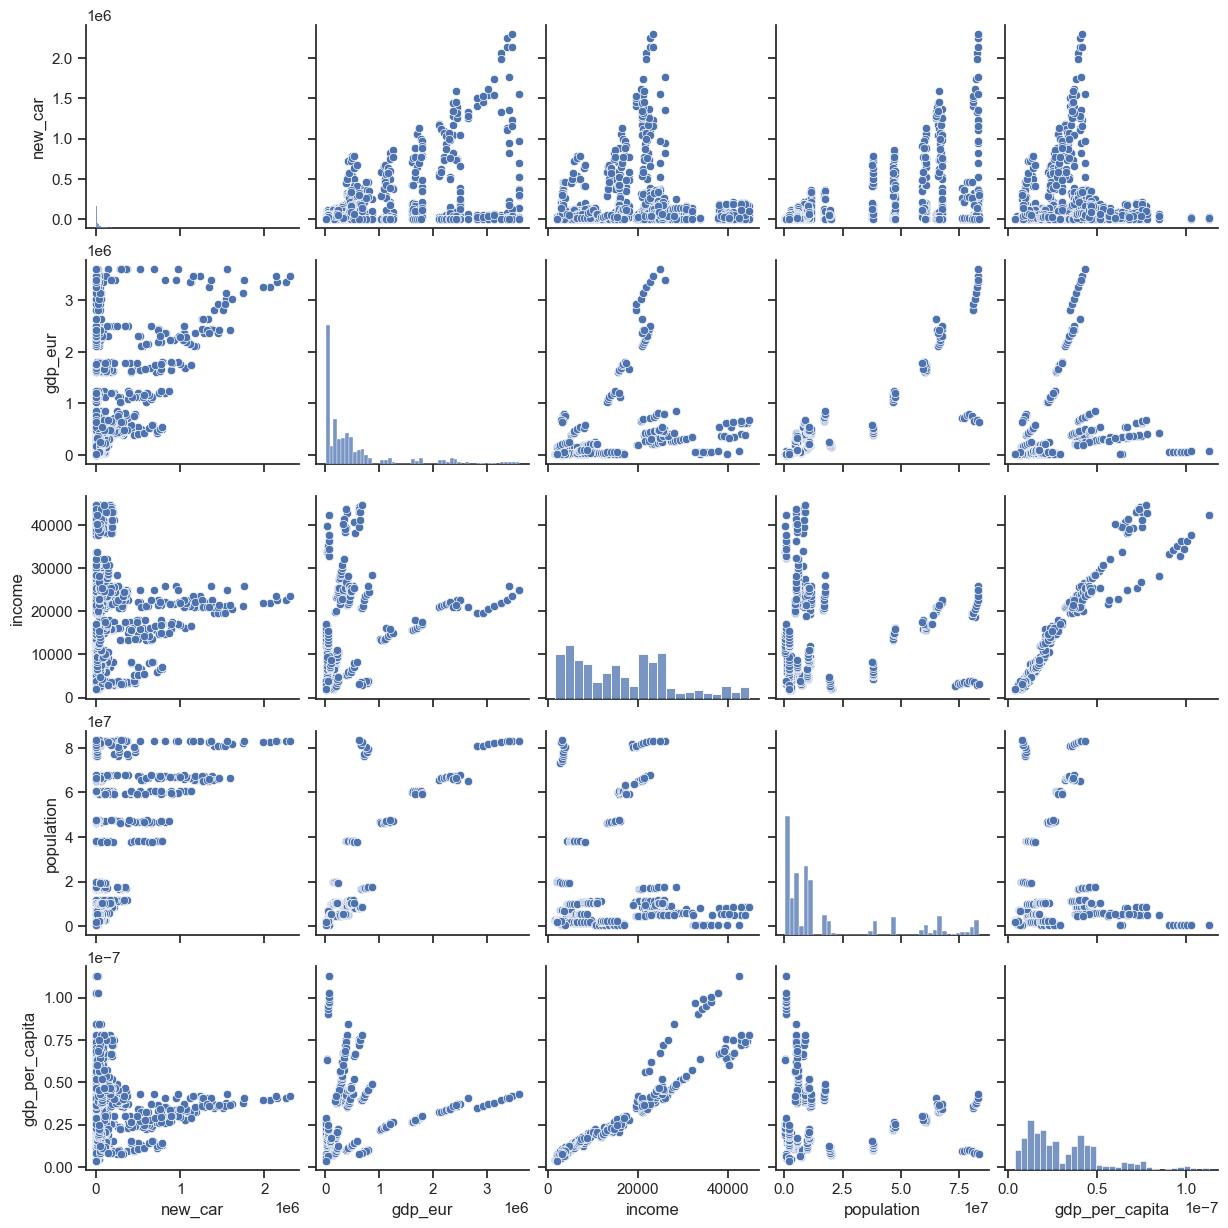

In [73]:
# Creating a pair plot 

g = sns.pairplot(sub_2)

#### Pair plots for electric cars only

In [74]:
# Keeping only the variables I want to use in the pair plot

sub_ev_2 = sub_ev[['new_car', 'gdp_eur', 'income','population', 'gdp_per_capita']]

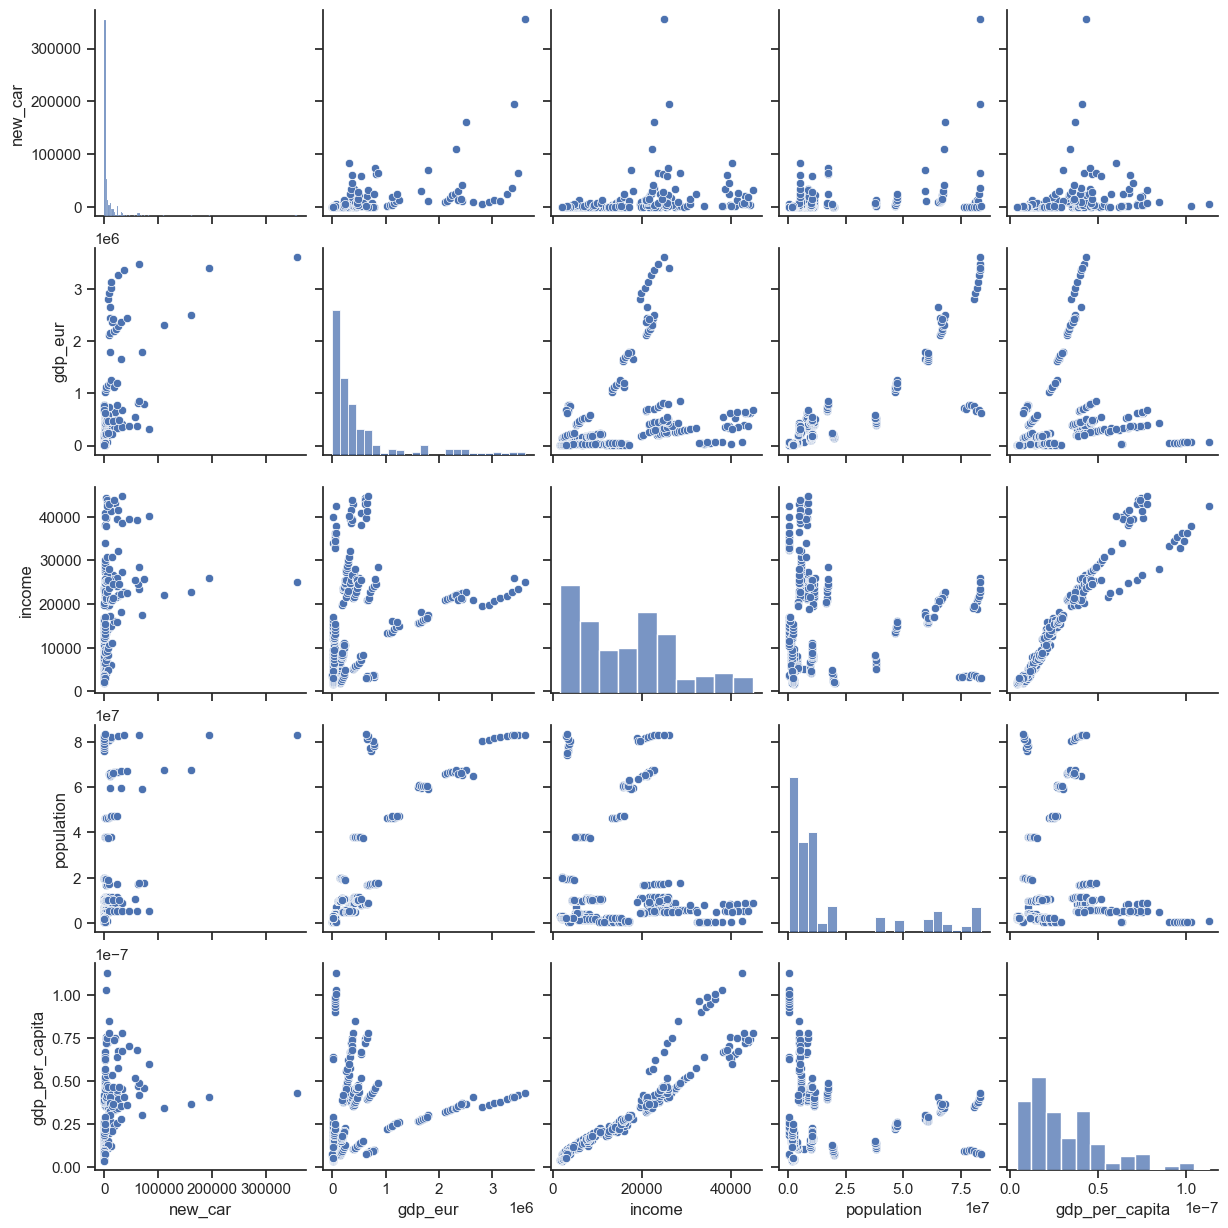

In [75]:
# Creating a pair plot 

g_ev = sns.pairplot(sub_ev_2)

From the above pair plot for electric cars, we see that there are some outliers country which purchase more electric vehicles than other countries regardless the GDP, GDP per capita, population or income.

From the plots we see that there is slight positive correlation between GDP per capita and income and the sales of new electric cars.

## 3.4 Categorical plots

C:\Users\henri\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


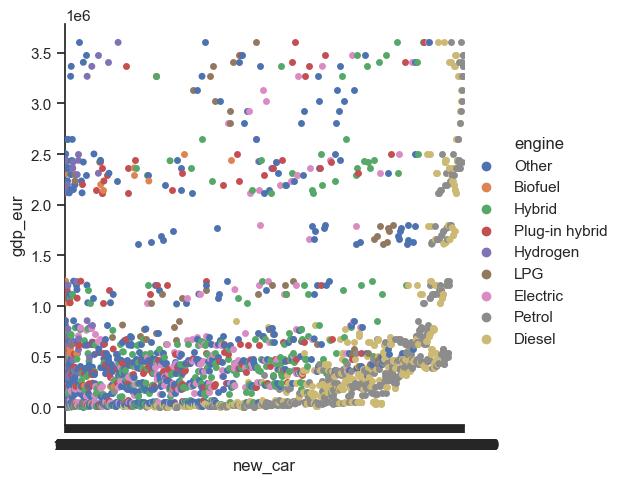

In [76]:
# Create a categorical plot in seaborn using the engine categories

sns.set(style="ticks")
engine = sns.catplot(x="new_car", y="gdp_eur", hue="engine", data=car_df)

Although the above catplot is not very easy to read, we see that the most popular new car is stil petrol and diesel, regardless the country's GDP

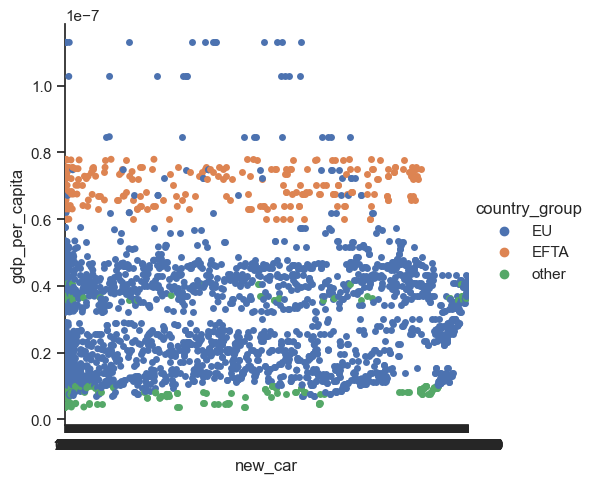

In [77]:
# Create a categorical plot in seaborn using the country group categories

sns.set(style="ticks")
country_group = sns.catplot(x="new_car", y="gdp_per_capita", hue="country_group", data=car_df)

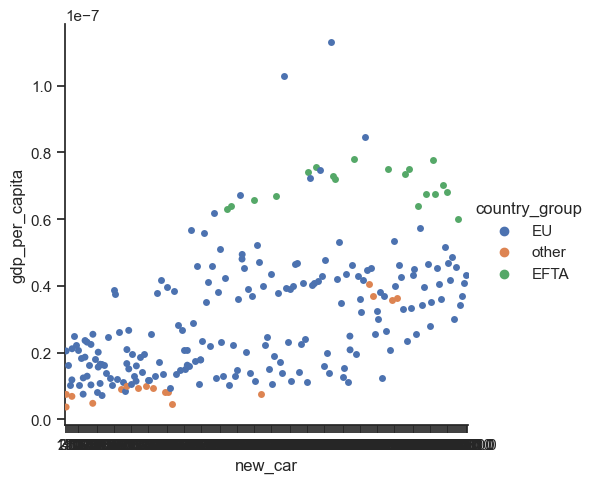

In [78]:
# Create a categorical plot in seaborn using the country group categories

sns.set(style="ticks")
country_group_ev = sns.catplot(x="new_car", y="gdp_per_capita", hue="country_group", data=ev_only)

From the above catplot, we see that the GDP per capita and electric new car purchase have a small positive correlation, however we see some outliers. Interestingly, we see the EFTA countries grouped with quite high gdp per capita and high purchase of new electric cars. We see the opposite for other European countries: low GDP per capita and low purchase of the new electric cars. There is one outlier for other European countries, which must by United Kingdom.

## 3.5. Bar plot

#### Creating a plot of new car sales by engine type

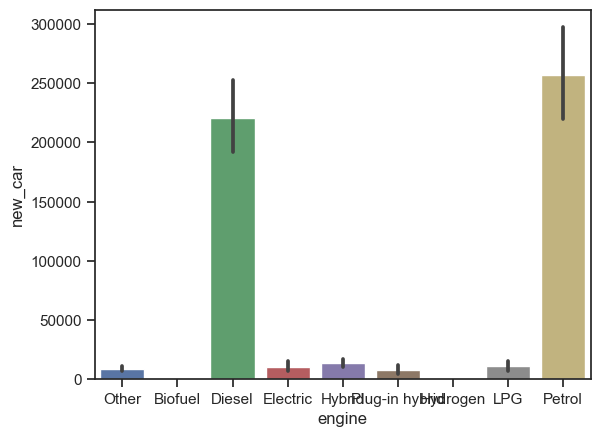

In [79]:
plot_engine = sns.barplot(data = car_df, x = 'engine', y = 'new_car', orient = 'v')

As expected, the highest new car sales are petrol and diesel cars. This is however, the total from 2013 to 2021. We have to create a temporal analysis to see the trend later on.

#### Creating a plot of new car sales by country

C:\Users\henri\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\henri\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\henri\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\henri\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\henri\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\henri\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\henri\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of e

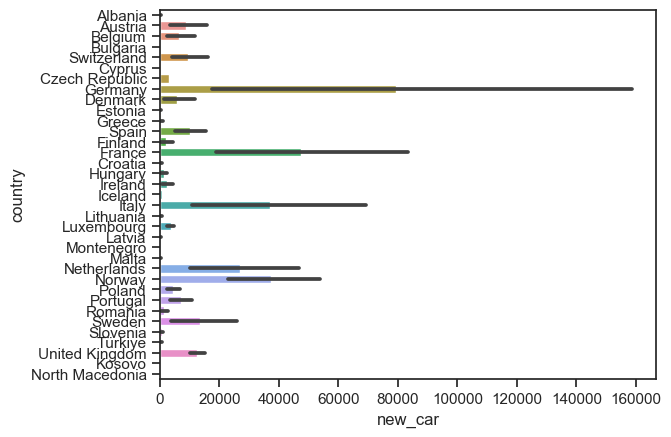

In [80]:
plot_engine = sns.barplot(data = ev_only, y = 'country', x = 'new_car', orient = 'h')

In total numbers, we see that Germany is the country with the highest new cr sales of electric vehicles. Followed by France, Italy, Norway and Netherlands. These are all countries with high GDP and population.

# 4. Questions to explore

#### 4.1. How is the trend of electric vehicles in Europe? Is it going steadily upwards?

Since I did not perform the time analysis, this question cannot be answered yet.

#### 4.2. With the current trend, will EU reach sales of only EV by 2035?

Since I did not perform the time analysis, this question cannot be answered yet.

#### 4.3. Which countries have the highest sales of EV cars? What are the reasons?

I did not perform the geographical analysis yet, so this question cannot be answered right now.

#### 4.4. Which car engine is most popular? And which one is growing fastest?

We see that in total numbers, petrol and diesel are the most popular engine types. However, the data is cumulated for 2013-2021. We need to perfom a temporal analysis later on to see the trends.

#### 4.5. Is there a correlation between number of inhabitants, GDP and income and the sales of the new EV in each country?

There is a correlation between GDP and population. There are however some outliers to be checked in details by country or year.

#### 4.6. Can the same trend as in the EU be observed in other European countries (e.g., EFTA)?

Since the EFTA countries have on average higher GDP, they are more inclined to purchase new electric cars. The other European countries, on the other hand, purchase less EV cars.

To see the trends in details, we need to perfom spatial analysis later on.

# 5. Hypothesis

The hypothesis we can form based on the above exploratory analysis is the following:

#### The higher the GDP per capita, the higher sales of the new electric vehicles.